# Esperimento di ottica: diffrazione

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import math
import os, sys
plt.style.use('seaborn-whitegrid')
import matplotlib
matplotlib.rcParams.update({'errorbar.capsize': 3})

%precision 20
np.set_printoptions(suppress=True) #sopprime la notazione scientifica

In [2]:
df = pd.read_csv('Capstone_Data.csv',delimiter=',')
n = df.shape[1] #number of columns
df

,Light Intensity (% of scale max) Alessio_0.02_1.5_lampadina_old,Position (m) Alessio_0.02_1.5_lampadina_old,Light Intensity (% of scale max) Alessandra_0.02_1.5_lampadina_old,Position (m) Alessandra_0.02_1.5_lampadina_old,Light Intensity (% of scale max) Antonio_0.02_1.5_lampadina,Position (m) Antonio_0.02_1.5_lampadina,Light Intensity (% of scale max) Alessio_0.04_1.5_lampadina,Position (m) Alessio_0.04_1.5_lampadina,Light Intensity (% of scale max) Alessandra_0.04_1.5_lampadina,Position (m) Alessandra_0.04_1.5_lampadina,...,Time (s) intensità_laser_sole.1,Light Intensity (% of scale max) intensità_laser_sole.1,Time (s) rumore_abientale_1.5_candela,Light Intensity (% of scale max) rumore_abientale_1.5_candela,Light Intensity (% of scale max) Alessio_0.02_1.5_lampadina,Position (m) Alessio_0.02_1.5_lampadina,Light Intensity (% of scale max) Alessandra_0.02_1.5_lampadina,Position (m) Alessandra_0.02_1.5_lampadina,Light Intensity (% of scale max) Antonio_0.02_1.5_lampadina_2,Position (m) Antonio_0.02_1.5_lampadina_2
0,0.2,0.0,0.2,0.0,0.1,0.0,0.0,0.0,0.0,0.0,...,0.00,24.1,0.00,1.3,0.0,0.0,0.0,0.0,0.0,0.0
1,0.2,0.0,0.2,0.0,0.1,0.0,0.0,0.0,0.0,0.0,...,0.04,24.2,0.04,1.3,0.0,0.0,0.0,0.0,0.0,0.0
2,0.2,0.0,0.2,0.0,0.1,0.0,0.0,0.0,0.0,0.0,...,0.08,24.2,0.08,1.3,0.0,0.0,0.0,0.0,0.0,0.0
3,0.2,0.0,0.2,0.0,0.1,0.0,0.0,0.0,0.0,0.0,...,0.12,24.2,0.12,1.3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.2,0.0,0.2,0.0,0.1,0.0,0.0,0.0,0.0,0.0,...,0.16,24.2,0.16,1.3,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,301.56,23.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,301.60,23.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,301.64,23.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,301.68,23.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We split the main csv file into subsets save the dataframes into csv files

In [3]:
set_names = []
k = 0
d = {}
for i in range(0,n,2):
    set_names.append(df.columns[::][i].rpartition(' ')[2])
    #print(set_names[k])
    d[set_names[k]] = df.iloc[:,i:i+2].dropna()
    df.iloc[:,i:i+2].dropna().to_csv("sets\ "+ set_names[k]+ ".txt",sep='\t',float_format="%.10f",index=False)
    k +=1

Alessio_0.02_1.5_lampadina_old
Alessandra_0.02_1.5_lampadina_old
Antonio_0.02_1.5_lampadina
Alessio_0.04_1.5_lampadina
Alessandra_0.04_1.5_lampadina
Antonio_0.04_1.5_lampadina
Alessio_0.08_1.5_lampadina
Alessandra_0.08_1.5_lampadina
Antonio_0.08_1.5_lampadina
Alessio_0.16_1.5_lampadina
Alessandra_0.16_1.5_lampadina
Antonio_0.16_1.5_lampadina
Alessio_0.02_1.0_candela
Alessio_0.04_1.0_lampada
Antonio_0.08_0.5_lampadina
Alessio_0.16_0.5_lampadina
rumore_di_fondo_candela
rumore_ambientale_candela
laser_candela
intensità_laser_sole
rumore_di_fondo_lampadina
Alessio_doubleslit_0.08_0.5_1.5_lampadina
Alessio_doubleslit_0.04_0.25_1.5_lampadina
intensità_laser_sole.1
rumore_abientale_1.5_candela
Alessio_0.02_1.5_lampadina
Alessandra_0.02_1.5_lampadina
Antonio_0.02_1.5_lampadina_2


In [4]:
#per esempio possiamo aprire il primo set di dati e plottarlo, vediamo se li ho divisi correttamente
d['Alessio_0.02_1.5_lampadina_old']

,Light Intensity (% of scale max) Alessio_0.02_1.5_lampadina_old,Position (m) Alessio_0.02_1.5_lampadina_old
0,0.2,0.000000e+00
1,0.2,0.000000e+00
2,0.2,0.000000e+00
3,0.2,0.000000e+00
4,0.2,0.000000e+00
...,...,...
2171,0.2,-2.060000e-16
2172,0.2,-2.060000e-16
2173,0.2,-2.060000e-16
2174,0.2,-2.060000e-16


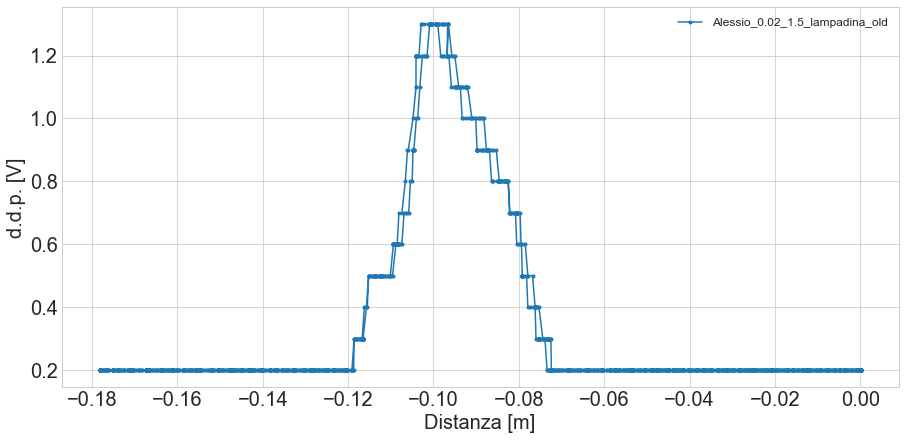

In [5]:
fig, ax = plt.subplots(figsize=(15, 7))
plt.errorbar(d['Alessio_0.02_1.5_lampadina_old'].iloc[:,1:].values,d['Alessio_0.02_1.5_lampadina_old'].iloc[:,:1].values,
             xerr = None,marker='.', label=df.columns[::][0].rpartition(' ')[2]);

plt.xlabel('Distanza [m]', fontsize =20)
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
plt.ylabel('d.d.p. [V]', fontsize = 20)
plt.xticks(np.arange(-0.18, 0.01, step=0.02))
plt.legend(loc=1, prop={'size': 12});
plt.show()

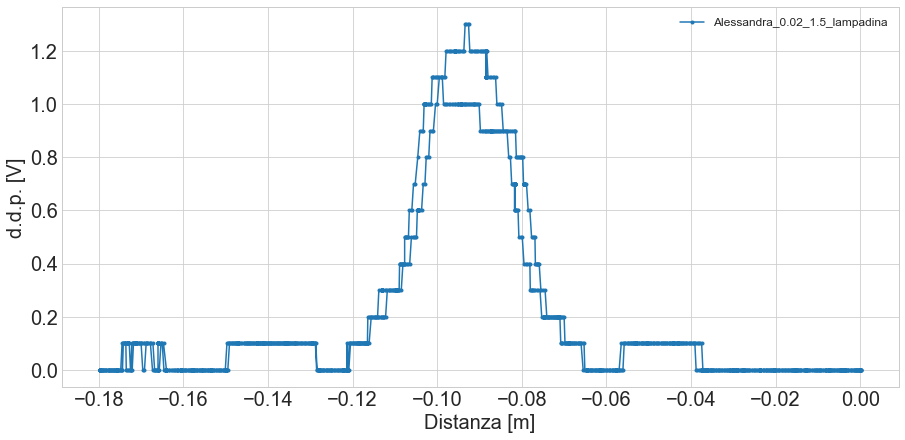

In [6]:
fig, ax = plt.subplots(figsize=(15, 7))
plt.errorbar(d['Alessandra_0.02_1.5_lampadina'].iloc[:,1:].values,d['Alessandra_0.02_1.5_lampadina'].iloc[:,:1].values,
             xerr = None,marker='.', label=df.columns[::][(-1)*2-2].rpartition(' ')[2]);

plt.xlabel('Distanza [m]', fontsize =20)
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
plt.ylabel('d.d.p. [V]', fontsize = 20)
plt.xticks(np.arange(-0.18, 0.01, step=0.02))
plt.legend(loc=1, prop={'size': 12});
plt.show()